<a href="https://colab.research.google.com/github/vmadalasa/EVA4S5/blob/master/Madhu_S5Model4_with_dropout_trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODEL OBSERVATIONS


#Target:

In this trial, we want to reduce overfitting by doing a dropout 



#Results:
Parameters: 9468

I tried with different dropout values
As per Jason Brownlee in https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/; we could have different dropout values in higher and lower layers and these impact differently. 
So, obviously, i have to try it here.

Dropout value 0.1 across all layers
Best Training Accuracy: 98.96
Best Test Accuracy: 99.22

then i tried dropout of 0.25 across all layers. this is a disaster. 
Overfitting did not reduce (train, 98.4, test 98.3) but more importantly accuracy went for a toss. 

So tried now with differential dropouts.
in first set of conv layers, drop only 0.1, but in deeper layers, drop 0.2.
This yielded best train accuracy of 98.67 and best test accuracy of 99.2

So the 0.1 dropout seems to be best

#Analysis:
Model overfit has decreased
0.1 dropout seems to be the best
Let's now see if we can add some capacity in the next section




#Second Skeleton model with batch norm and without regularisation (dropouts)

Input size 28X28X1; output_size = 26X26X12; RF 3X3 - Convinput - with batchnorm and dropout

Input size 26X26X12; output_size = 24X24X12; RF 5X5 - convblock1A- with batchnorm and dropout
Input size 24X24X12; output_size = 22X22X20; RF 7X7 - convblock1B- with batchnorm and dropout

Now Max pool to get this to Input size 22X22X20; output_size = 11X11X20; RF 14X14 - pool1
Input size 11X11X20 output_size = 11X11X12; RF 14X14 - tranblock1

Convblock 2
Input size 11X11X12; output_size = 9X9X12; RF 16X16 - convblock2A- with batchnorm and dropout
Input size 9X9X12; output_size = 7X7X16; RF 18X18 convblock2B- with batchnorm and dropout
Input size 7X7X16; output_size = 5X5X16; RF 20X20 convblock2C- with batchnorm and dropout

Now we have reached only till RF of 20X20
We do self.gap layer at kernel size 5 - gap
finally transblock 1X1 for Input size 1X1X16; output_size = 1X1X10; RF 20X20 - convblockEnd WITHOUT batch norm here

#BATCH SIZE = 128

#NO ROTATION OF IMAGES


# OBSERVATIONS
 





In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
#Model with batchnorm and dropout

# Input size 28X28X1; output_size = 26X26X12; RF 3X3 - Convinput 
# Input size 26X26X12; output_size = 24X24X12; RF 5X5 - convblock1A
# Input size 24X24X12; output_size = 22X22X20; RF 7X7 - convblock1B

#Now Max pool to get this to Input size 22X22X20; output_size = 11X11X20; RF 14X14 - pool1
# Input size 11X11X20 output_size = 11X11X12; RF 14X14 - tranblock1

#Convblock 2
# Input size 11X11X12; output_size = 9X9X12; RF 16X16 - convblock2A
# Input size 9X9X12; output_size = 7X7X16; RF 18X18 - convblock2B
# Input size 7X7X16; output_size = 5X5X16; RF 20X20 - convblock2C

#We do self.gap layer at kernel size 5 - gap
#finally transblock 1X1 for Input size 1X1X16; output_size = 1X1X10; RF 20X20 - convblockEnd WITHOUT batch norm here


dropout_value2 = 0.1
dropout_value1 = 0.2

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()


        # Input Block
        self.convinput = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Dropout(dropout_value2)
        ) # Input size 28X28X1; output_size = 26X26X12; RF 3X3


       # CONVOLUTION BLOCK 1
        self.convblock1A = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Dropout(dropout_value2)
        ) # Input size 26X26X12; output_size = 24X24X12; RF 5X5

        self.convblock1B = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.Dropout(dropout_value2)
        ) # Input size 24X24X12; output_size = 22X22X12; RF 7X7

    

        # TRANSITION BLOCK 1

        self.pool1 = nn.MaxPool2d(2, 2) # # # Input size 22X22X12; output_size = 11X11X12; RF 14X14
        
        self.tranblock1 = nn.Sequential(
           nn.Conv2d(in_channels=20, out_channels=12, kernel_size=(1, 1), padding=0, bias=False),
        ) # # # Input size 11X11X16; output_size = 11X11X12; RF 14X14

      # CONVOLUTION BLOCK 2
        self.convblock2A = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Dropout(dropout_value1)
        ) # Input size 11X11X12; output_size = 9X9X12; RF 16X16


 
        self.convblock2B = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(), 
            nn.Dropout(dropout_value1)  
        ) # # Input size 9X9X12; output_size = 7X7X16; RF 18X18

        self.convblock2C = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(), 
            nn.Dropout(dropout_value1) 
        ) # # Input size 7X7X16; output_size = 5X5X16; RF 20X20


      # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5)
        ) # output_size = 1

        self.convblockEnd = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value) 

        ) #Input size 1X1X16; output_size = 1X1X10; RF 20X20


    def forward(self, x):
        x = self.convinput(x)

        x = self.convblock1A(x)
        x = self.convblock1B(x)
        
        x = self.pool1(x)
        #x = self.poolAlt1(x)
        x = self.tranblock1(x)

        x = self.convblock2A(x)
        x = self.convblock2B(x)
        x = self.convblock2C(x)

        x = self.gap(x)        
       
        x = self.convblockEnd(x)
        #print(x.shape)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)
        
        
     

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 26, 26]             108
       BatchNorm2d-2           [-1, 12, 26, 26]              24
              ReLU-3           [-1, 12, 26, 26]               0
           Dropout-4           [-1, 12, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,296
       BatchNorm2d-6           [-1, 12, 24, 24]              24
              ReLU-7           [-1, 12, 24, 24]               0
           Dropout-8           [-1, 12, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           2,160
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1, 12,

In [0]:
#WHAT WE CHANGE IN THIS BLOCK
#BATCHSIZE = 128 IN BASIC SKELETON MODEL
#NO ROTATION

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        #transforms.RandomRotation((-9.0, 9.0), fill=(1,)),                    
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)




CUDA Available? True


In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [0]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 16):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    print('Epoch', epoch, ' done')

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.17386691272258759 Batch_id=468 Accuracy=76.69: 100%|██████████| 469/469 [00:14<00:00, 31.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2923, Accuracy: 9178/10000 (91.78%)

Epoch 1  done
EPOCH: 2


Loss=0.10843674093484879 Batch_id=468 Accuracy=96.36: 100%|██████████| 469/469 [00:14<00:00, 31.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0959, Accuracy: 9720/10000 (97.20%)

Epoch 2  done
EPOCH: 3


Loss=0.07916603982448578 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:14<00:00, 31.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0832, Accuracy: 9748/10000 (97.48%)

Epoch 3  done
EPOCH: 4


Loss=0.1491168588399887 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:14<00:00, 32.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0722, Accuracy: 9789/10000 (97.89%)

Epoch 4  done
EPOCH: 5


Loss=0.1007818803191185 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:14<00:00, 32.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0567, Accuracy: 9823/10000 (98.23%)

Epoch 5  done
EPOCH: 6


Loss=0.06819498538970947 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:14<00:00, 32.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9892/10000 (98.92%)

Epoch 6  done
EPOCH: 7


Loss=0.10549235343933105 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:14<00:00, 32.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 9868/10000 (98.68%)

Epoch 7  done
EPOCH: 8


Loss=0.05674971640110016 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:14<00:00, 32.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0407, Accuracy: 9876/10000 (98.76%)

Epoch 8  done
EPOCH: 9


Loss=0.12041569501161575 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:14<00:00, 32.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0377, Accuracy: 9887/10000 (98.87%)

Epoch 9  done
EPOCH: 10


Loss=0.09492161124944687 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:14<00:00, 32.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0408, Accuracy: 9877/10000 (98.77%)

Epoch 10  done
EPOCH: 11


Loss=0.007760514970868826 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:14<00:00, 32.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9901/10000 (99.01%)

Epoch 11  done
EPOCH: 12


Loss=0.05818244442343712 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:14<00:00, 32.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9901/10000 (99.01%)

Epoch 12  done
EPOCH: 13


Loss=0.010234460234642029 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:14<00:00, 32.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0387, Accuracy: 9886/10000 (98.86%)

Epoch 13  done
EPOCH: 14


Loss=0.017079511657357216 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:14<00:00, 32.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0403, Accuracy: 9889/10000 (98.89%)

Epoch 14  done
EPOCH: 15


Loss=0.022781237959861755 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:14<00:00, 32.57it/s]



Test set: Average loss: 0.0262, Accuracy: 9920/10000 (99.20%)

Epoch 15  done


Text(0.5, 1.0, 'Test Accuracy')

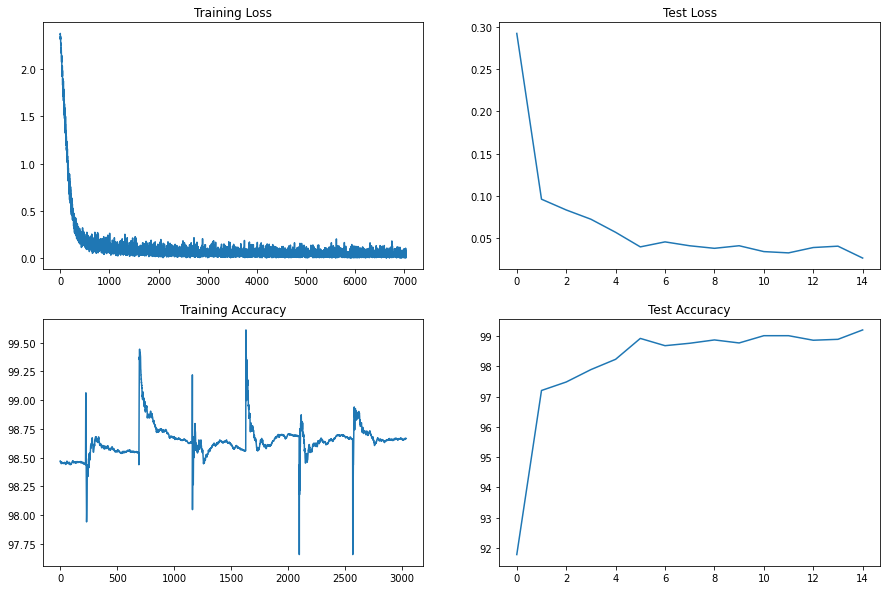

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")